In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split


In [2]:
myAdam = keras.optimizers.Adam(learning_rate=0.1) # настройка Адам
my_SGD = keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, nesterov=True) # SGD с включением нестеровских моментов


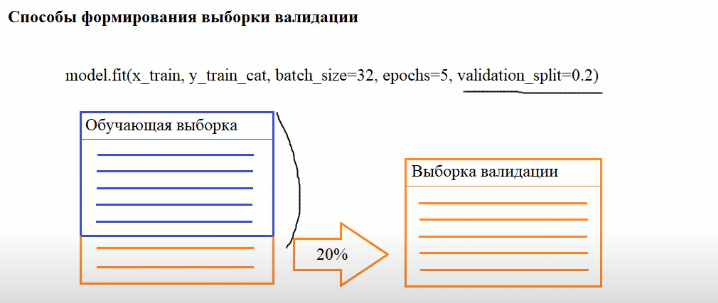

In [4]:
# Из недостатков - разбиение происходит случайным образом и нет доступа к информации, чтобы посмотреть как она разбилась

In [5]:
# Второй способ - оазбивать вручную!

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные

In [9]:
# стандартизация входных данных
x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [10]:
# Все множество x_train это 60к наблюдений, и мы хотим 10к взять на валидацию

size_val = 10000

x_val_split = x_train[:size_val] #10к наблюдений
y_val_split = y_train_cat[:size_val]

# теперь оставим все остальные значения обучающей выборке

x_train_split = x_train[size_val:]
y_train_split = y_train_cat[size_val:]

In [ ]:
# Ранее мы неявно разбивали выборку, указывая validation_split=0.2, то есть 20 процентов
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


# А теперь зададим разбиение на валидационную явно, как показывал выше:

model.fit(x_train, y_train_cat, 
         batch_size=32, epochs=5,
          validation_data = (x_val_split, y_val_split)
         )

In [ ]:
# Но и такой способ просто выбора данных не самый удачный, нам желательно наблюдения для выборки валидации выбрать случайно

# для этого воспользуемся пакетом 
# sklearn.model_selection.train_test_split

In [11]:
!pip3 install sklearn

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=0247037a695de574402d96d21035021bd303061b60a4cb6b7d987232a6864085
  Stored in directory: /home/alex/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
You should consider upgrading via the '/home/alex/jupyter/environment/bin/python -m pip install --upgrade pip' command.


In [15]:
# Воспользуемся этой функцией 

from sklearn.model_selection import train_test_split

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train_cat, test_size=0.2
)

# Случайным обазом разбивает на 2 выборки, тренировочную и валидационную, а дальше 
# мы их передаем в predict через validation_data